# Level 12: Advanced Applications

This level explores more advanced and specialized applications of Pandas, including building reusable data processing pipelines, working with large datasets, and integrating with other popular data science libraries.

In [2]:
import pandas as pd
import numpy as np

## 12.1 Custom Functions & `.pipe()`

The `.pipe()` method allows you to chain together custom functions, making your data transformation workflows more organized and readable.

In [3]:
def clean_data(df):
    """A sample data cleaning function."""
    df = df.dropna()
    df['price'] = df['price'].str.replace('$', '').astype(float)
    return df

def add_features(df, tax_rate=0.08):
    """A sample feature engineering function."""
    df['price_with_tax'] = df['price'] * (1 + tax_rate)
    return df

data = {
    'product': ['A', 'B', 'C', 'D'],
    'price': ['$100', '$200', np.nan, '$150']
}
df = pd.DataFrame(data)

Now, we can use `.pipe()` to apply these functions in a chain.

In [4]:
processed_df = (
    df.pipe(clean_data)
      .pipe(add_features, tax_rate=0.09)
)

processed_df

C:\Users\tyagi\AppData\Local\Temp\ipykernel_15196\4207516514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$', '').astype(float)
C:\Users\tyagi\AppData\Local\Temp\ipykernel_15196\4207516514.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_with_tax'] = df['price'] * (1 + tax_rate)


,product,price,price_with_tax
0,A,100.0,109.0
1,B,200.0,218.0
3,D,150.0,163.5


## 12.2 `.apply()` with Axis

While we've seen `.apply()` before, understanding its axis-wise operation is crucial.
- `axis=0` (or `'index'`): Apply function to each column.
- `axis=1` (or `'columns'`): Apply function to each row.

**Performance Tip:** Row-wise `.apply()` (`axis=1`) can be very slow because it applies the function to each row individually, which is an iterative process. Always prefer vectorized operations if possible.

In [5]:
df_apply = pd.DataFrame(np.random.randint(0, 100, size=(3, 4)), columns=list('ABCD'))
df_apply

,A,B,C,D
0,34,61,26,42
1,99,10,66,1
2,73,39,51,99


In [6]:
# Column-wise apply (e.g., get the range of each column)
df_apply.apply(lambda x: x.max() - x.min(), axis=0)

A    65
B    51
C    40
D    98
dtype: int32

In [7]:
# Row-wise apply (e.g., get the sum of each row)
df_apply.apply(np.sum, axis=1)

0    163
1    176
2    262
dtype: int64

## 12.3 Working with Large Data

When datasets are too large to fit into memory, you can process them in chunks.

In [8]:
# First, let's create a large dummy CSV file
large_data = {'A': np.random.randint(0, 100, 10000)}
large_df = pd.DataFrame(large_data)
large_df.to_csv('large_data.csv', index=False)

### Chunking with `pd.read_csv()`
The `chunksize` parameter in `pd.read_csv` returns an iterator that you can loop through.

In [9]:
total_sum = 0
chunk_iter = pd.read_csv('large_data.csv', chunksize=1000)

for chunk in chunk_iter:
    # Process each chunk
    total_sum += chunk['A'].sum()

print(f"Total sum: {total_sum}")

Total sum: 492422


## 12.4 Integration with Other Libraries

Pandas DataFrames are the standard data structure in the Python data science ecosystem and integrate seamlessly with other libraries.

### Matplotlib/Seaborn for Plotting

<Axes: xlabel='A', ylabel='B'>

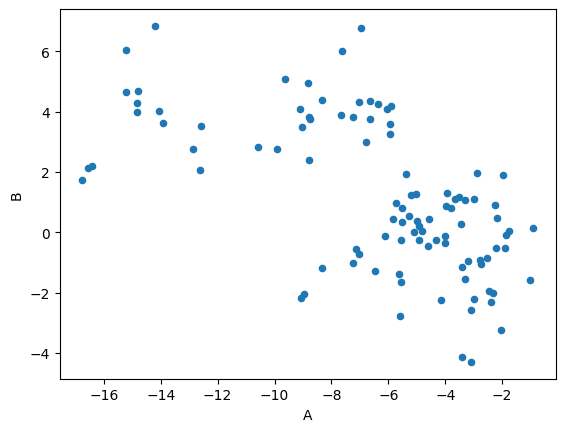

In [10]:
# You might need to install matplotlib: !pip install matplotlib
plot_df = pd.DataFrame(np.random.randn(100, 2), columns=['A', 'B']).cumsum()
plot_df['C'] = pd.Series(list('abcde') * 20)

# Pandas has a built-in .plot() method (which uses Matplotlib)
plot_df.plot(x='A', y='B', kind='scatter')

### Scikit-learn for Machine Learning

In [11]:
# You might need to install scikit-learn: !pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df_ml = pd.DataFrame(np.random.rand(100, 2), columns=['feature', 'target'])

# Pandas DataFrames are passed directly to scikit-learn functions
X = df_ml[['feature']]
y = df_ml['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
print(f"Model score: {model.score(X_test, y_test):.2f}")

Model score: -0.05


### SQLAlchemy for Database Workflows
You can read from and write to SQL databases.

In [13]:
# You might need to install sqlalchemy: !pip install sqlalchemy
# For an in-memory database, we use sqlite
from sqlalchemy import create_engine

engine = create_engine('sqlite:///:memory:')

df_to_sql = pd.DataFrame({'name': ['Alice', 'Bob'], 'score': [95, 88]})

# Write DataFrame to a SQL table
df_to_sql.to_sql('students', con=engine, index=False)

# Read data from a SQL query into a DataFrame
df_from_sql = pd.read_sql('SELECT * FROM students WHERE score > 90', con=engine)
df_from_sql

,name,score
0,Alice,95
